In [1]:
library(tidyverse)
library(repr)
library(tidymodels) 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

Read and assign our csv weather dataset into `weather`

In [2]:
weather <- read_csv("weather_data.csv")
head(weather) 

Rows: 8784 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Date/Time, Weather
dbl (6): Temp_C, Dew Point Temp_C, Rel Hum_%, Wind Speed_km/h, Visibility_km...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Date/Time     Temp_C Dew Point Temp_C Rel Hum_% Wind Speed_km/h Visibility_km
1 1/1/2012 0:00 -1.8   -3.9             86        4               8.0          
2 1/1/2012 1:00 -1.8   -3.7             87        4               8.0          
3 1/1/2012 2:00 -1.8   -3.4             89        7               4.0          
4 1/1/2012 3:00 -1.5   -3.2             88        6               4.0          
5 1/1/2012 4:00 -1.5   -3.3             88        7               4.8          
6 1/1/2012 5:00 -1.4   -3.3             87        9               6.4          
  Press_kPa Weather             
1 101.24    Fog                 
2 101.24    Fog                 
3 101.26    Freezing Drizzle,Fog
4 101.27    Freezing Drizzle,Fog
5 101.23    Fog                 
6 101.27    Fog

# Weather Classification
### DSCI 100 Group Project Proposal

#### Group 24, Section 008
#### Group Members: David Lim, Livlene Tiwana, Haolan Wu, Bella Zhang
<font size="1">
Project Sources:

https://scied.ucar.edu/learning-zone/how-weather-works/weather 

https://education.nationalgeographic.org/resource/precipitation/ 

https://letstalkscience.ca/educational-resources/stem-explained/why-weather-so-hard-predict 
</font>

<img src="https://media.giphy.com/media/l378pB7qXV89jAXHW/giphy.gif"></img>

<font size="1"> image source: https://wow.uscgaux.info/content.php?unit=140-03-26&category=1338405672 </font> 

### A Little About Weather and Our Data:

Weather predictions play a pivotal role in various aspects of people's daily lives, encompassing 
everyday activities such as commuting to work or school, as well as impacting critical sectors like agriculture and tourism. Consequently, the ability to forecast weather (clear, rain, snow) accurately, utilizing key atmospheric indicators such as temperature, humidity and atmospheric pressure, promises significant convenience for our lives. 

**The question we are trying to answer** is to use these atmospheric indicators to predict forecast weather using classification techniques in R.

Our dataset features the target variables in the weather column representing weather categories, encompassing seven **primary** classifications: 

- clear 
- rain 
- snow
- cloudy
- haze
- fog
- drizzle
- multiple combinations of predictors above 
- (check [weather dataset](https://www.kaggle.com/datasets/bhanupratapbiswas/weather-data) for more)

Because there's an overflow (43) of different (and somewhat insignificant) classes, we had to decide which ones to keep, and which to remove, as keeping them all would be near impossible to classify with any degree of accuracy. Continue reading to find out which!

# Choosing Our Target Variables

#### We can first take the counts of our weather classes to see how many data points are labelled for each class.

We do this to observe any potential imbalances in class distribution. This imbalance can have several implications, and understanding these implications is crucial in the context of algorithms like k-nearest neighbors (KNN).

#### We can first take the counts of our weather classes to see how many data points are labelled for each class.

We do this to observe any potential imbalances in class distribution. This imbalance can have several implications, and understanding these implications is crucial in the context of algorithms like k-nearest neighbors (KNN).

In [3]:
# Get counts:

weather_counts <- weather |>
  group_by(Weather) |>
  summarize(count = n()) |>
  arrange(desc(count))

weather_counts

Weather                                 count
1  Mainly Clear                            2106 
2  Mostly Cloudy                           2069 
3  Cloudy                                  1728 
4  Clear                                   1326 
5  Snow                                     390 
6  Rain                                     306 
7  Rain Showers                             188 
8  Fog                                      150 
9  Rain,Fog                                 116 
10 Drizzle,Fog                               80 
11 Snow Showers                              60 
12 Drizzle                                   41 
13 Snow,Fog                                  37 
14 Snow,Blowing Snow                         19 
15 Rain,Snow                                 18 
16 Haze                                      16 
17 Thunderstorms,Rain Showers                16 
18 Drizzle,Snow,Fog                          15 
19 Freezing Rain                             14 
20 Freezing Drizzle,Snow                     11 
21 Freezing Drizzle                           7 
22 Freezing Drizzle,Fog                       6 
23 Snow,Ice Pellets                           6 
24 Snow,Haze                                  5 
25 Freezing Fog                               4 
26 Freezing Rain,Fog                          4 
27 Moderate Snow                              4 
28 Rain,Snow,Ice Pellets                      4 
29 Snow Showers,Fog                           4 
30 Freezing Drizzle,Haze                      3 
31 Rain,Haze                                  3 
32 Thunderstorms,Rain                         3 
33 Thunderstorms,Rain Showers,Fog             3 
34 Drizzle,Snow                               2 
35 Freezing Rain,Haze                         2 
36 Moderate Snow,Blowing Snow                 2 
37 Rain Showers,Snow Showers                  2 
38 Thunderstorms                              2 
39 Drizzle,Ice Pellets,Fog                    1 
40 Freezing Rain,Ice Pellets,Fog              1 
41 Freezing Rain,Snow Grains                  1 
42 Moderate Rain,Fog                          1 
43 Rain Showers,Fog                           1 
44 Rain,Ice Pellets                           1 
45 Rain,Snow Grains                           1 
46 Rain,Snow,Fog                              1 
47 Snow Pellets                               1 
48 Thunderstorms,Heavy Rain Showers           1 
49 Thunderstorms,Moderate Rain Showers,Fog    1 
50 Thunderstorms,Rain,Fog                     1

#### First, we can observe that...
- Mainly Clear (2106)
- Mostly Cloudy (2069)
- Cloudy (1728)
- Clear (1326)
- Snow (390)
- Rain (306)
- Rain Showers (188)
- Fog (150)

On average, have significantly more data points than the rest of our classes. Because it will be near impossible to classify these points with our model (and classifying multiple at once is outside the scope of our question), we will remove those from our possible cases. 

Great! Now we have it narrowed down to 8 target variables. Lets see what this looks like when we plot it against temperature and atmospheric pressure (we will explain why we chose these variables after this section.

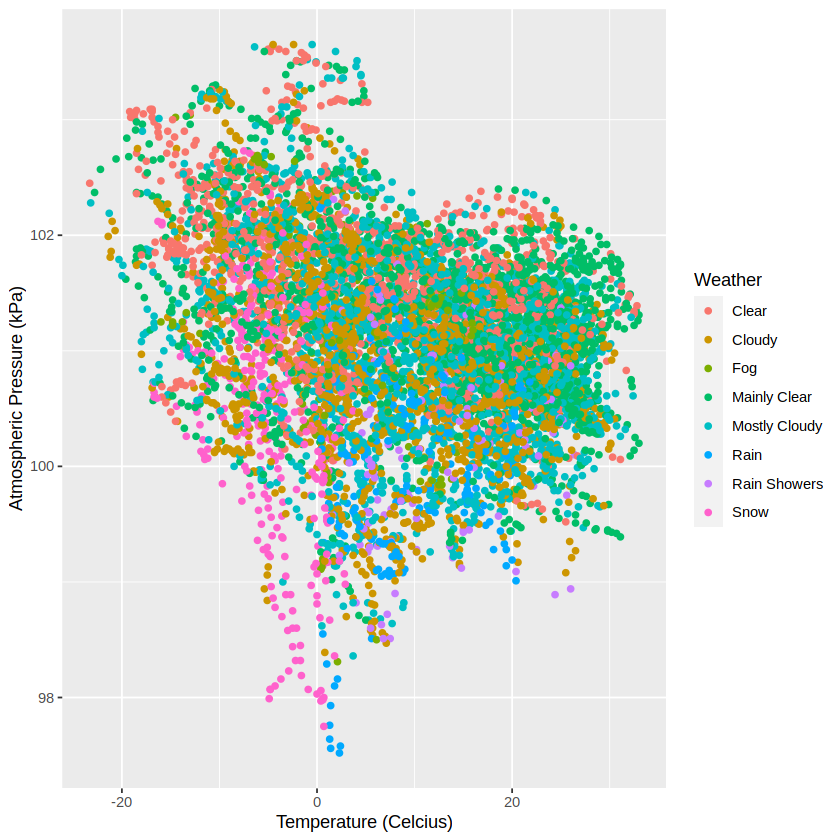

In [4]:
desired_weather <- c("Snow", "Clear", "Rain", "Mostly Clear", "Mainly Clear", "Mostly Cloudy", "Cloudy", "Clear", "Rain Showers", "Fog")

weather_removed_low_count <- weather |>
    filter(Weather %in% desired_weather) |>
    rename(temperature = Temp_C, pressure = Press_kPa, weather = Weather)

weather_data_plot <- weather_removed_low_count |>
    ggplot(aes(x = temperature, y = pressure, color = weather)) +
    geom_point() +
    labs(x = "Temperature (Celcius)", y = "Atmospheric Pressure (kPa)", color = "Weather")

weather_data_plot

Woah! As you can observe, any distinction between classes seems to be masked by overplotted data and lowers our chances of accurately classifying. To combat this, we decided to do some research on how we can distinguish important (real world) variables from the rest.

We found that rain, snow, and clear conditions were often fundamental and easily distinguishable categories, representing distinct atmospheric conditions with significant meanings for various applications. For example, in transportation, rain and snow can impact road safety, while clear weather is generally associated with optimal conditions. Therefore, we select different weather scenarios as the target variable categories. 

Moreover, when observing the distribution of our data, we found that these (rain, snow, and clear) target variable categories are roughly balanced, which improves the accuracy and stability of the prediction model by preventing overfitting one of the variable categories. Observe below...

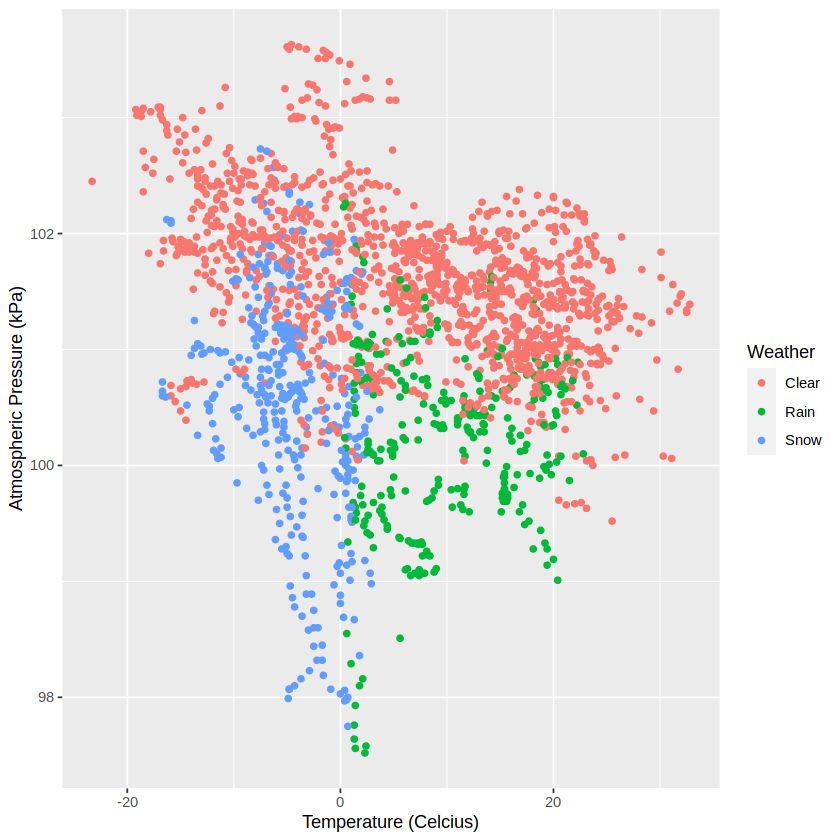

In [5]:
chosen_weather <- c("Snow", "Clear", "Rain")

weather_chosen_variables <- weather |>
    select(Temp_C, Press_kPa, Weather) |>
    filter(Weather %in% chosen_weather) |>
    rename(temperature = Temp_C, pressure = Press_kPa, weather = Weather)

weather_data_plot <- weather_chosen_variables |>
    ggplot(aes(x = temperature, y = pressure, color = weather)) +
    geom_point() +
    labs(x = "Temperature (Celcius)", y = "Atmospheric Pressure (kPa)", color = "Weather")

weather_data_plot

We can now observe a clear distinction between our three weather classes and are ready to start classifying! But wait, we should first discuss why we're only looking at temperature and atmospheric pressure, right?

# Choosing Our Predictors

Our [weather dataset](https://www.kaggle.com/datasets/bhanupratapbiswas/weather-data) comprises seven forecasted variables, including temperature, precipitation, humidity, wind speed and direction, atmospheric pressure, cloud cover, and UV index. However, for our project, we will concentrate on two of these variables: 

- Temperature
- Atmospheric pressure

Temperature and atmospheric pressure are reliable indicators for predicting weather conditions as: 

- Clear skies are associated with high atmospheric pressure
- Rain occurs in warmer conditions above freezing temperatures
- Snow is commonly linked to colder temperatures below freezing. The interplay between temperature and atmospheric pressure influences cloud formation and precipitation.

Low atmospheric pressure, coupled with specific temperature levels, leads to the convergence and rising of air, causing condensation and the formation of clouds. The interaction of temperature and pressure ultimately determines the type of precipitation—rain if above freezing or snow if below freezing. 

# Begin Classification

The first step in our data analysis is to wrangle our data to the conditions as presented above, namely filtering our weather categories (and renaming them for simplicity). Because we already did this earlier, we'll just reassign that to the variable `weather_wrangled`. We'll also **standardize** our data so our data won't be too heavily skewed towards pressure.

In [6]:
set.seed(2000)

weather_recipe <- recipe(weather ~ ., data = weather_chosen_variables) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

weather_wrangled <- weather_recipe |>  
                            prep() |> 
                            bake(weather_chosen_variables)

slice(weather_wrangled, 1:6)

temperature pressure    weather
1 -0.1130329  -1.51345396 Rain   
2 -0.1746255  -1.57652603 Rain   
3 -1.6792444  -0.24150070 Snow   
4 -1.9344137   0.58894812 Clear  
5 -1.6528476   0.07385961 Snow   
6 -1.4416730  -0.22047668 Snow

Next we'll split our data into training and testing sets using 0.75 proportion for our training set based on:
- size: enough data point to allocate a smaller percentage for testing so our model is more accurate) 
- complexity: lowered our complexity of parameters so we don't need as large of testing set to get a more accurate estimate of its generalization performance.

In [7]:
set.seed(2000)

weather_split <- initial_split(weather_wrangled, prop = 0.75, strata = weather)

weather_train <- training(weather_split)

weather_test <- testing(weather_split)

Then we will choose our k-value by preforming a 5-fold cross validation and setting our seed to 2000 for reproducibility.

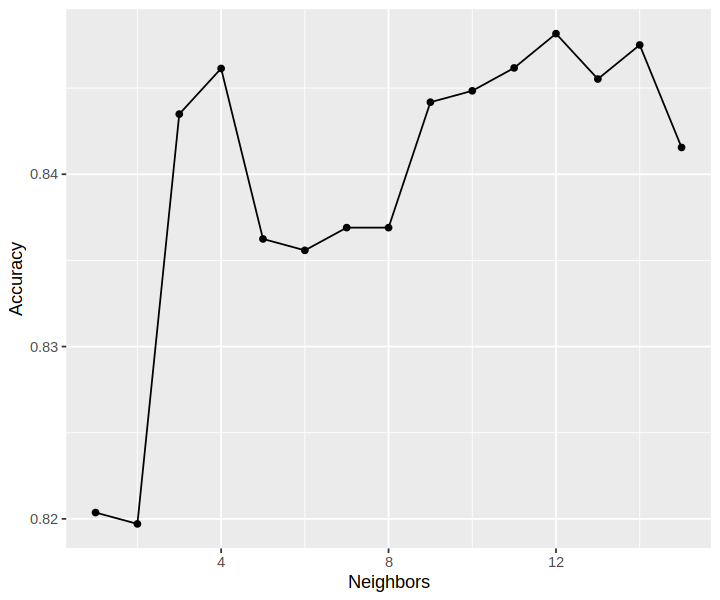

In [14]:
set.seed(2000)
options(repr.plot.height = 5, repr.plot.width = 6)

knn_recipe <- weather_recipe

k_vfold <- vfold_cv(weather_train, v = 5, strata = weather)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_workflow <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec)

k_vals <- tibble(neighbors = seq(from = 1, to = 15))

knn_result <- knn_workflow |>
    tune_grid(resamples = k_vfold, grid = k_vals) |>
    collect_metrics()

knn_accuracies <- knn_result |>
    filter(.metric == "accuracy")

cross_val_plot <- knn_accuracies |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy")

cross_val_plot

We can see by our graph above, that having k = 12 neighbours would give us the highest accuracy. This make intuitive sense as we have some overlapping "sections" of classes in our graph and so utilizing a slightly higher k value would be most beneficial to encompass a wider radius of datapoints.

In [17]:
set.seed(2000)

weather_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 12) |>
    set_engine("kknn") |>
    set_mode("classification")

weather_results <- workflow() |>
    add_recipe(weather_recipe) |>
    add_model(weather_spec) |>
    fit(data = weather_train)

weather_results

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(12,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.150495
Best kernel: rectangular
Best k: 12

# Classifying Our Testing Data
We can now try to predict the class label for our testing set `weather_test` using what we found above.

In [18]:
weather_test_predictions <- predict(weather_results, weather_test)|>
    bind_cols(weather_test)
    weather_test_predictions

.pred_class temperature pressure    weather
1   Rain        -0.1746255  -1.5765260  Rain   
2   Snow        -1.3448847  -0.3045728  Snow   
3   Snow        -1.2744931  -0.4096929  Snow   
4   Snow        -0.8873397  -0.9878534  Snow   
5   Snow        -1.0721175  -0.9142694  Snow   
6   Snow        -1.2568952  -0.3991809  Clear  
7   Snow        -1.3096889  -0.3676448  Clear  
8   Snow        -1.2392974  -0.3676448  Clear  
9   Snow        -1.5032656  -0.6304451  Snow   
10  Snow        -1.5472603  -0.6830051  Snow   
11  Snow        -1.4680698  -1.1350216  Snow   
12  Snow        -0.8345461  -1.1455336  Snow   
13  Snow        -0.7729535  -1.1455336  Snow   
14  Snow        -0.7641545  -1.0824615  Snow   
15  Snow        -0.7289588  -0.8932453  Snow   
16  Snow        -0.6057736  -0.7355652  Snow   
17  Clear       -1.0193238   0.7466283  Snow   
18  Clear       -0.9225355   0.5258761  Snow   
19  Snow        -0.3242075  -0.9983655  Snow   
20  Rain        -0.3066096  -1.0719495  Snow   
21  Snow        -0.3858001  -1.1980937  Snow   
22  Clear       -1.5032656   0.4102439  Clear  
23  Snow        -1.0721175  -0.5989091  Snow   
24  Snow        -0.9929270  -0.7565892  Snow   
25  Snow        -0.9577312  -1.0088775  Snow   
26  Snow        -0.8697418  -3.2689597  Snow   
27  Snow        -1.3008899  -1.3978218  Snow   
28  Clear       -2.4975460   1.3353009  Clear  
29  Clear       -1.8024296   1.6086131  Clear  
30  Clear       -1.8728211   1.7557813  Clear  
⋮   ⋮           ⋮           ⋮           ⋮      
478 Clear       -1.2832921   0.96738050 Clear  
479 Clear       -0.9665302   1.46144499 Clear  
480 Clear       -0.9841281   1.50349303 Clear  
481 Clear       -1.0193238   1.14608467 Clear  
482 Clear       -1.3888794   1.58758911 Clear  
483 Clear       -1.3624825   1.64014916 Clear  
484 Clear       -1.2480963   1.42990896 Clear  
485 Clear       -0.7641545  -0.06279653 Snow   
486 Snow        -0.4121969  -0.98785344 Rain   
487 Snow        -0.3858001  -1.32423778 Snow   
488 Snow        -0.3594032  -1.70267015 Snow   
489 Clear       -0.3945990   0.33665987 Snow   
490 Snow        -0.2626149  -3.17435161 Rain   
491 Snow        -0.5265831  -3.26895971 Snow   
492 Snow        -0.6409694  -3.00615945 Snow   
493 Snow        -0.9489323  -1.76574221 Snow   
494 Snow        -1.0809164  -0.81966128 Snow   
495 Snow        -1.4240751   0.05283559 Clear  
496 Clear       -1.4152762   0.14744368 Clear  
497 Clear       -1.0721175   0.84123637 Clear  
498 Clear       -1.5648582   1.33530086 Clear  
499 Clear       -1.5648582   1.36683689 Clear  
500 Snow        -1.1425090  -0.15740462 Snow   
501 Snow        -1.1073132  -0.24150070 Snow   
502 Snow        -0.7993503  -0.50430096 Snow   
503 Snow        -0.9841281   0.09488363 Clear  
504 Snow        -0.9577312  -0.42020488 Snow   
505 Snow        -0.8521439  -0.57788504 Snow   
506 Clear       -0.5617789  -1.04041350 Snow   
507 Snow        -0.4297948  -1.20860566 Snow

And finally, lets look at how accurate we are classifying our testing data.

In [22]:
weather_prediction_accuracy <- weather_test_predictions |>
    metrics(truth = weather, estimate = .pred_class)
    
weather_prediction_accuracy

.metric  .estimator .estimate
1 accuracy multiclass 0.8382643
2 kap      multiclass 0.6654193